In [1]:
#3 clusters 9 vars (cluster 0 y 1 con enfermos, cluster 2 14% )

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('cardiovascular_3clusters_sin_nocorr.csv', delimiter=',')
df.head()

,sbp,ldl,adiposity,typea,alcohol,age,chd,tabaco_anual,famhist_Absent,famhist_Present,cluster
0,160,5.73,23.11,49,97.20,52,1,0.324324,False,True,1
1,144,4.41,28.61,55,2.06,63,1,0.000208,True,False,0
2,118,3.48,32.28,52,3.81,46,0,0.002581,False,True,0
3,170,6.41,38.03,51,24.26,58,1,0.174419,False,True,1
4,134,3.50,27.78,60,57.34,49,1,0.400000,False,True,0


In [4]:
df.cluster.value_counts()

cluster
0    191
2    167
1    104
Name: count, dtype: int64

#Modelos para cluster 0

In [5]:

#X = df.drop(['chd','obesity','tobacco'],axis=1)
#X = df.drop(['chd'],axis=1)
#X = df.drop(['chd','alcohol_over_median','tabaco_over_median','age_over_median','ldl_over_median','adiposity_over_median','sbp_over_median'], axis=1)

#X = df[['alcohol_over_median','tabaco_over_median','age_over_median','ldl_over_median','adiposity_over_median','sbp_over_median']]


df_c0= df[ (df['cluster']==0 )]
df_c0

,sbp,ldl,adiposity,typea,alcohol,age,chd,tabaco_anual,famhist_Absent,famhist_Present,cluster
1,144,4.41,28.61,55,2.06,63,1,0.000208,True,False,0
2,118,3.48,32.28,52,3.81,46,0,0.002581,False,True,0
4,134,3.50,27.78,60,57.34,49,1,0.400000,False,True,0
5,132,6.47,36.21,62,14.14,45,0,0.206667,False,True,0
7,114,4.59,14.60,62,6.72,58,1,0.094884,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...
453,124,7.22,39.68,36,0.00,51,1,0.044444,False,True,0
454,146,4.82,28.02,60,8.23,39,1,0.026667,True,False,0
459,108,1.59,15.23,40,26.64,55,0,0.075000,True,False,0
460,118,11.61,30.79,64,23.97,40,0,0.216000,True,False,0


In [6]:
X = df_c0.drop(['chd','cluster'], axis=1)
y= df_c0['chd']
X

,sbp,ldl,adiposity,typea,alcohol,age,tabaco_anual,famhist_Absent,famhist_Present
1,144,4.41,28.61,55,2.06,63,0.000208,True,False
2,118,3.48,32.28,52,3.81,46,0.002581,False,True
4,134,3.50,27.78,60,57.34,49,0.400000,False,True
5,132,6.47,36.21,62,14.14,45,0.206667,False,True
7,114,4.59,14.60,62,6.72,58,0.094884,False,True
...,...,...,...,...,...,...,...,...,...
453,124,7.22,39.68,36,0.00,51,0.044444,False,True
454,146,4.82,28.02,60,8.23,39,0.026667,True,False
459,108,1.59,15.23,40,26.64,55,0.075000,True,False
460,118,11.61,30.79,64,23.97,40,0.216000,True,False


In [7]:
X["sbp"].count()

191

In [8]:
#Normalizamos con standarscaler - escala entre 0 y variacion estandars
#scaler = StandardScaler()
scaler = MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[8.57142857e-01, 2.39024390e-01, 5.39787798e-01, ...,
        2.93803419e-04, 1.00000000e+00, 0.00000000e+00],
       [2.38095238e-01, 1.74216028e-01, 6.61472149e-01, ...,
        3.63937138e-03, 0.00000000e+00, 1.00000000e+00],
       [6.19047619e-01, 1.75609756e-01, 5.12267905e-01, ...,
        5.64102564e-01, 0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 4.25087108e-02, 9.61538462e-02, ...,
        1.05769231e-01, 1.00000000e+00, 0.00000000e+00],
       [2.38095238e-01, 7.40766551e-01, 6.12068966e-01, ...,
        3.04615385e-01, 1.00000000e+00, 0.00000000e+00],
       [5.71428571e-01, 2.67595819e-01, 6.98938992e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

<Axes: >

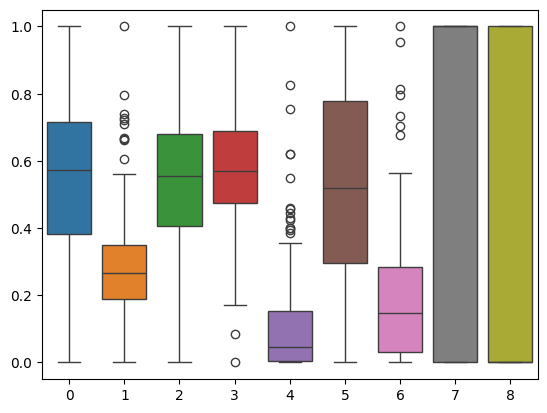

In [9]:
sns.boxplot(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=270724)
X_train.shape

(152, 9)

In [11]:
X_test.shape

(39, 9)

#Reg. Logistica

In [12]:
# Crear el modelo de regresión logística
model = LogisticRegression(solver='lbfgs', max_iter=1000)
# Validación cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=270724)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
# Entrenar el modelo
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
# Evaluar el modelo
y_pred = model.predict(X_test)

In [14]:
# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print('Classification Report sin SMOTE:')
print(class_report)

# Resultados de validación cruzada
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.2f}')

Accuracy: 0.56
Confusion Matrix:
[[13  9]
 [ 8  9]]
Classification Report sin SMOTE:
              precision    recall  f1-score   support

           0       0.62      0.59      0.60        22
           1       0.50      0.53      0.51        17

    accuracy                           0.56        39
   macro avg       0.56      0.56      0.56        39
weighted avg       0.57      0.56      0.57        39

Cross-validation accuracy scores: [0.625      0.625      0.6        0.73333333 0.6        0.73333333
 0.53333333 0.6        0.73333333 0.46666667]
Mean cross-validation accuracy: 0.62


#con SMOTE

In [15]:
smote = SMOTE(random_state=270724)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [16]:
X_train_res.shape

(168, 9)

In [17]:
y_train_res.shape

(168,)

In [18]:
# Crear el modelo de regresión logística
model = LogisticRegression(solver='lbfgs', max_iter=1000)
# Validación cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=270724)
cv_scores = cross_val_score(model, X_train_res, y_train_res, cv=cv, scoring='accuracy')
# Entrenar el modelo
model.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000)

In [19]:
# Evaluar el modelo
y_pred = model.predict(X_test)
# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print('Classification Report con SMOTE:')
print(class_report)

# Resultados de validación cruzada
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.2f}')

Accuracy: 0.62
Confusion Matrix:
[[12 10]
 [ 5 12]]
Classification Report con SMOTE:
              precision    recall  f1-score   support

           0       0.71      0.55      0.62        22
           1       0.55      0.71      0.62        17

    accuracy                           0.62        39
   macro avg       0.63      0.63      0.62        39
weighted avg       0.64      0.62      0.62        39

Cross-validation accuracy scores: [0.52941176 0.70588235 0.58823529 0.64705882 0.35294118 0.64705882
 0.70588235 0.82352941 0.6875     0.5625    ]
Mean cross-validation accuracy: 0.62


In [20]:
X_train.shape

(152, 9)

In [21]:
X_train_res.shape

(168, 9)

# con mejor modelo

In [22]:
# Usamos GridSearchCV para encontrar los mejores hiperparámetros para el modelo de RL.

# Hiperparámetros para buscar
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],

}

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000)

# Validación cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=270724)
cv_scores = cross_val_score(model, X_train_res, y_train_res, cv=cv, scoring='accuracy')

# Configurar GridSearchCV
grid_search = GridSearchCV(model,
                           param_grid,
                           cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=270224),
                           scoring='accuracy')


# Entrenar el modelo
grid_search.fit(X_train_res, y_train_res)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=10, max_iter=1000, solver='liblinear')

In [23]:
# Evaluar el mejor modelo de regresión logística
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report con SMOTE y best model:')
print(class_report)

Logistic Regression Accuracy: 0.56
Confusion Matrix:
[[12 10]
 [ 7 10]]
Classification Report con SMOTE y best model:
              precision    recall  f1-score   support

           0       0.63      0.55      0.59        22
           1       0.50      0.59      0.54        17

    accuracy                           0.56        39
   macro avg       0.57      0.57      0.56        39
weighted avg       0.57      0.56      0.57        39



In [24]:
X_train.shape

(152, 9)

In [25]:
X_train_res.shape

(168, 9)

Resultado sigue siendo malo, tendriamos que probar modificando hiperparametros

#SVM


In [26]:
#svm_rbf = SVC ( kernel='rbf', random_state=270224)
#svm_rbf = SVC (kernel='poly', random_state=270224)

svm_rbf = SVC ( kernel='sigmoid', random_state=270224)

In [27]:
param_grid_rbf = {
    'C': [0.1, 1, 10, 25, 50, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

In [28]:
grid_search_rbf = GridSearchCV(svm_rbf,
                               param_grid_rbf,
                               cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=270224),
                               scoring = 'accuracy',
                               verbose = 1,
                               n_jobs=-1)

In [29]:
#grid_search_rbf.fit(X_train_res,y_train_res)
grid_search_rbf.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=270224, shuffle=True),
             estimator=SVC(kernel='sigmoid', random_state=270224), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 25, 50, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             scoring='accuracy', verbose=1)

In [30]:
best_rbf = grid_search_rbf.best_estimator_
best_rbf

SVC(C=100, gamma=0.1, kernel='sigmoid', random_state=270224)

In [31]:
y_pred=best_rbf.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Regression Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

SVM Regression Accuracy: 0.67
Confusion Matrix:
[[16  6]
 [ 7 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.73      0.71        22
           1       0.62      0.59      0.61        17

    accuracy                           0.67        39
   macro avg       0.66      0.66      0.66        39
weighted avg       0.66      0.67      0.67        39



In [33]:
X_train.shape

(152, 9)

In [34]:
X_train_res.shape

(168, 9)

#Red neuronal

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(152, 9)
(152,)
(39, 9)
(39,)


In [36]:
num_neuronas = X_train.shape[1]
num_neuronas_salida=1 # ha de ser uno de salida #len(df["chd"].unique())
print(f"1 capa:{num_neuronas} salida: {num_neuronas_salida}")

1 capa:9 salida: 1


In [37]:
# Modelo inicial de 9, 3 capas intermedia de 9 neuronas y salida de 1 neurona con relu sin dropout
#Si funciona: 1 - ( 0.35)-2 ( 0.3) - 3 (0.2)- 4 - 5

model = Sequential()
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dense(units = int(num_neuronas_salida),activation='hard_sigmoid')) # softmax
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['binary_accuracy'])

In [38]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=150)

In [39]:
model.fit(x=X_train,
          y=y_train,
          epochs=800,
          batch_size=50,
          validation_data=(X_test, y_test), verbose=1
        ,          callbacks=[early_stop]
          )

Epoch 1/800
4/4 [==============================] - 3s 130ms/step - loss: 0.2515 - accuracy: 0.4605 - val_loss: 0.2498 - val_accuracy: 0.4872
Epoch 2/800
4/4 [==============================] - 0s 21ms/step - loss: 0.2527 - accuracy: 0.4803 - val_loss: 0.2494 - val_accuracy: 0.5385
Epoch 3/800
4/4 [==============================] - 0s 18ms/step - loss: 0.2490 - accuracy: 0.5855 - val_loss: 0.2492 - val_accuracy: 0.5128
Epoch 4/800
4/4 [==============================] - 0s 24ms/step - loss: 0.2489 - accuracy: 0.5263 - val_loss: 0.2493 - val_accuracy: 0.4872
Epoch 5/800
4/4 [==============================] - 0s 23ms/step - loss: 0.2512 - accuracy: 0.5197 - val_loss: 0.2491 - val_accuracy: 0.5128
Epoch 6/800
4/4 [==============================] - 0s 24ms/step - loss: 0.2493 - accuracy: 0.5000 - val_loss: 0.2489 - val_accuracy: 0.5128
Epoch 7/800
4/4 [==============================] - 0s 20ms/step - loss: 0.2479 - accuracy: 0.5658 - val_loss: 0.2487 - val_accuracy: 0.5641
Epoch 8/800
4/4 [==

<Axes: >

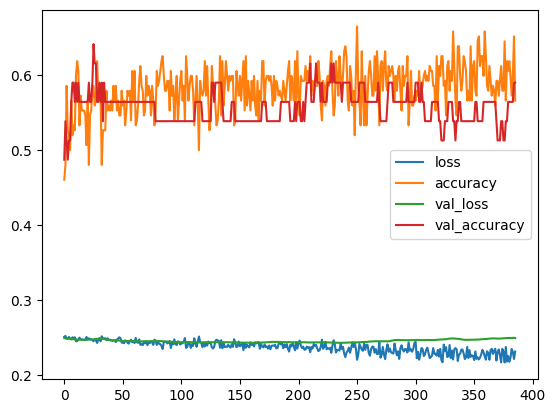

In [40]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [41]:
predictions = model.predict(X_test)
predictions[:5]

2/2 [==============================] - 0s 6ms/step


array([[0.5959584 ],
       [0.4790221 ],
       [0.60272235],
       [0.18646893],
       [0.31979296]], dtype=float32)

In [42]:
# pasar predictions a 0-1
#predictions = predictions > 0.5
from sklearn.preprocessing import binarize

predictions=binarize(predictions, threshold=0.5)
predictions[:5]

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [43]:
clases = [0, 1]

array_clase_test=np.array(y_test)
# Calcular y mostrar la matriz de confusión
cnf_matrix = confusion_matrix(array_clase_test, predictions)
print("Confusion Matrix:\n", cnf_matrix)

# Calcular y mostrar el reporte de clasificación
report = classification_report(array_clase_test, predictions)
print("\nClassification Report sin SMOTE:\n", report)

# Calcular y mostrar la exactitud
accuracy = accuracy_score(array_clase_test, predictions)
print("\nAccuracy:\n", accuracy)

Confusion Matrix:
 [[12 10]
 [ 6 11]]

Classification Report sin SMOTE:
               precision    recall  f1-score   support

           0       0.67      0.55      0.60        22
           1       0.52      0.65      0.58        17

    accuracy                           0.59        39
   macro avg       0.60      0.60      0.59        39
weighted avg       0.60      0.59      0.59        39


Accuracy:
 0.5897435897435898


con SMOTE

---



In [44]:

model = Sequential()
#model.add(Dense(units = int(num_neuronas),activation='relu')) #relu
#model.add(Dropout(0.35))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dense(units = int(num_neuronas_salida),activation='hard_sigmoid')) #   softmax
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['binary_accuracy'])

In [45]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=150)

In [46]:
#con SMOTE
model.fit(x=X_train_res,
          y=y_train_res,
          epochs=800,
          batch_size=50,
          validation_data=(X_test, y_test), verbose=1
        ,          callbacks=[early_stop]
          )

Epoch 1/800
4/4 [==============================] - 2s 178ms/step - loss: 0.3127 - accuracy: 0.4940 - val_loss: 0.3135 - val_accuracy: 0.4359
Epoch 2/800
4/4 [==============================] - 0s 25ms/step - loss: 0.2922 - accuracy: 0.5179 - val_loss: 0.3041 - val_accuracy: 0.4359
Epoch 3/800
4/4 [==============================] - 0s 56ms/step - loss: 0.2841 - accuracy: 0.5000 - val_loss: 0.2967 - val_accuracy: 0.4359
Epoch 4/800
4/4 [==============================] - 0s 94ms/step - loss: 0.2828 - accuracy: 0.4940 - val_loss: 0.2902 - val_accuracy: 0.4359
Epoch 5/800
4/4 [==============================] - 0s 101ms/step - loss: 0.2812 - accuracy: 0.4881 - val_loss: 0.2850 - val_accuracy: 0.4359
Epoch 6/800
4/4 [==============================] - 0s 62ms/step - loss: 0.2677 - accuracy: 0.5119 - val_loss: 0.2805 - val_accuracy: 0.4359
Epoch 7/800
4/4 [==============================] - 0s 42ms/step - loss: 0.2703 - accuracy: 0.5060 - val_loss: 0.2768 - val_accuracy: 0.4359
Epoch 8/800
4/4 [=

<Axes: >

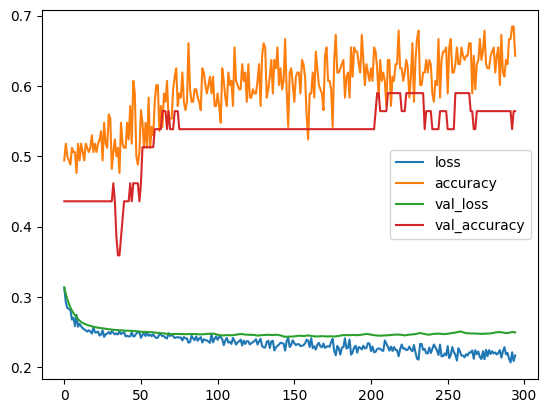

In [47]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [48]:
predictions = model.predict(X_test)
predictions[:5]

2/2 [==============================] - 0s 4ms/step


array([[0.63662547],
       [0.4386206 ],
       [0.6262638 ],
       [0.44283652],
       [0.47666785]], dtype=float32)

In [49]:
# pasar predictions a 0-1
#predictions = predictions > 0.5
from sklearn.preprocessing import binarize

predictions=binarize(predictions, threshold=0.5)
predictions[:5]

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [50]:
#Resultados
clases = [0, 1]

array_clase_test=np.array(y_test)
# Calcular y mostrar la matriz de confusión
cnf_matrix = confusion_matrix(array_clase_test, predictions)
print("Confusion Matrix:\n", cnf_matrix)

# Calcular y mostrar el reporte de clasificación
report = classification_report(array_clase_test, predictions)
print("\nClassification Report con SMOT bool mayor media:\n", report)

# Calcular y mostrar la exactitud
accuracy = accuracy_score(array_clase_test, predictions)
print("\nAccuracy:\n", accuracy)

Confusion Matrix:
 [[12 10]
 [ 7 10]]

Classification Report con SMOT bool mayor media:
               precision    recall  f1-score   support

           0       0.63      0.55      0.59        22
           1       0.50      0.59      0.54        17

    accuracy                           0.56        39
   macro avg       0.57      0.57      0.56        39
weighted avg       0.57      0.56      0.57        39


Accuracy:
 0.5641025641025641


In [51]:
X_train.shape

(152, 9)

In [52]:
X_train_res.shape

(168, 9)

# Modelos para grupo 1

In [53]:
df1=df[df["cluster"]==1]
df1.head()

,sbp,ldl,adiposity,typea,alcohol,age,chd,tabaco_anual,famhist_Absent,famhist_Present,cluster
0,160,5.73,23.11,49,97.20,52,1,0.324324,False,True,1
3,170,6.41,38.03,51,24.26,58,1,0.174419,False,True,1
10,206,2.95,32.27,72,56.06,60,1,0.133333,True,False,1
18,158,7.46,34.07,61,53.28,62,1,0.055319,False,True,1
22,150,6.38,33.99,62,0.00,50,0,0.008571,False,True,1


In [54]:
X = df1.drop(['chd','cluster'], axis=1)
y = df1['chd']

In [55]:
X[:2]

,sbp,ldl,adiposity,typea,alcohol,age,tabaco_anual,famhist_Absent,famhist_Present
0,160,5.73,23.11,49,97.20,52,0.324324,False,True
3,170,6.41,38.03,51,24.26,58,0.174419,False,True


In [56]:
df1["age"].count()

104

In [57]:
#Normalizamos con standarscaler - escala entre 0 y variacion estandars
#scaler = StandardScaler()
scaler =MinMaxScaler()
X=scaler.fit_transform(X)
X[:2]

array([[0.14705882, 0.32234727, 0.29433543, 0.6       , 0.9       ,
        0.68421053, 0.55632275, 0.        , 1.        ],
       [0.29411765, 0.37700965, 0.84672344, 0.63333333, 0.22462963,
        0.84210526, 0.2991852 , 0.        , 1.        ]])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=270724)
X_train.shape

(83, 9)

In [59]:
X_test.shape

(21, 9)

### Reg Logistica

Sin SMOTE

In [60]:
# Crear el modelo de regresión logística
model = LogisticRegression(solver='lbfgs', max_iter=1000)
# Validación cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=270724)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
# Entrenar el modelo
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [61]:
# Evaluar el modelo
y_pred = model.predict(X_test)

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print('Classification Report age sin SMOTE:')
print(class_report)

# Resultados de validación cruzada
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.2f}')

Accuracy: 0.52
Confusion Matrix:
[[5 6]
 [4 6]]
Classification Report age sin SMOTE:
              precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.50      0.60      0.55        10

    accuracy                           0.52        21
   macro avg       0.53      0.53      0.52        21
weighted avg       0.53      0.52      0.52        21

Cross-validation accuracy scores: [0.88888889 0.77777778 0.66666667 0.375      0.625      0.875
 0.75       0.625      1.         0.375     ]
Mean cross-validation accuracy: 0.70


Con SMOTE y best model

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=270724)

smote = SMOTE(random_state=270724)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Realizar modelo regresión logística
model = LogisticRegression(solver = "lbfgs", max_iter = 1000) # Le aplicamos el modelo lbfgs en particular + cuantas veces queremos entrenar el modelo con los datos
cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 270724) # Pedimos que mezcle datos y semilla
cv_score = cross_val_score(model, X_train_res, y_train_res, cv = cv, scoring = 'accuracy') # con métrica accuracy

# Entrenamos modelo
model.fit(X_train_res, y_train_res)
# Predicción de y
y_pred = model.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy = {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
reporte = classification_report(y_test, y_pred)
print(f"Classification Report ldl con SMOTE : {reporte}")


Accuracy = 0.52
Confusion Matrix:
[[5 6]
 [4 6]]
Classification Report ldl con SMOTE :               precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.50      0.60      0.55        10

    accuracy                           0.52        21
   macro avg       0.53      0.53      0.52        21
weighted avg       0.53      0.52      0.52        21



In [63]:
X_train.shape

(83, 9)

In [64]:
X_train_res.shape

(84, 9)

In [65]:
# Data aumentation para simular mas muestra

No hay diferencia si lo hacemos con SMOTE porque solo crea 2 registros,
Coger el más optimo tampoco influye

#SVM

con SMOTE

In [66]:
svm_rbf = SVC ( kernel='sigmoid', random_state=270224)
param_grid_rbf = {
    'C': [0.1, 1, 10, 25, 50, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}
grid_search_rbf = GridSearchCV(svm_rbf,
                               param_grid_rbf,
                               cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=270224),
                               scoring = 'accuracy',
                               verbose = 1,
                               n_jobs=-1)
#grid_search_rbf.fit(X_train_res,y_train_res)
grid_search_rbf.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=270224, shuffle=True),
             estimator=SVC(kernel='sigmoid', random_state=270224), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 25, 50, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             scoring='accuracy', verbose=1)

In [67]:
best_rbf = grid_search_rbf.best_estimator_
best_rbf

SVC(C=1, gamma=1, kernel='sigmoid', random_state=270224)

In [68]:
y_pred=best_rbf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Regression Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix age - SVM:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

SVM Regression Accuracy: 0.52
Confusion Matrix age - SVM:
[[5 6]
 [4 6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.50      0.60      0.55        10

    accuracy                           0.52        21
   macro avg       0.53      0.53      0.52        21
weighted avg       0.53      0.52      0.52        21



#Red Neuronal

In [69]:
num_neuronas = X_train.shape[1]
num_neuronas_salida=1 # ha de ser uno de salida #len(df["chd"].unique())
print(f"1 capa:{num_neuronas} salida: {num_neuronas_salida}")

1 capa:9 salida: 1


In [70]:
# Modelo inicial de 3, 3 capas intermedia de 9 neuronas y salida de 1 neurona con relu sin dropout
#Si funciona: 1 - ( 0.35)-2 ( 0.3) - 3 (0.2)- 4 - 5
model = Sequential()
model.add(Dense(units = int(num_neuronas),activation='relu')) #relu
model.add(Dropout(0.35))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dense(units = int(num_neuronas_salida),activation='hard_sigmoid')) #   softmax
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['binary_accuracy'])


In [71]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=150)

In [72]:
model.fit(x=X_train,
          y=y_train,
          epochs=800,
          batch_size=50,
          validation_data=(X_test, y_test), verbose=1
         ,          callbacks=[early_stop]
          )

Epoch 1/800
2/2 [==============================] - 2s 239ms/step - loss: 0.2627 - accuracy: 0.4578 - val_loss: 0.2507 - val_accuracy: 0.4762
Epoch 2/800
2/2 [==============================] - 0s 32ms/step - loss: 0.2606 - accuracy: 0.5181 - val_loss: 0.2501 - val_accuracy: 0.4762
Epoch 3/800
2/2 [==============================] - 0s 31ms/step - loss: 0.2502 - accuracy: 0.5422 - val_loss: 0.2498 - val_accuracy: 0.4762
Epoch 4/800
2/2 [==============================] - 0s 31ms/step - loss: 0.2452 - accuracy: 0.5181 - val_loss: 0.2495 - val_accuracy: 0.4762
Epoch 5/800
2/2 [==============================] - 0s 32ms/step - loss: 0.2472 - accuracy: 0.5060 - val_loss: 0.2493 - val_accuracy: 0.4762
Epoch 6/800
2/2 [==============================] - 0s 33ms/step - loss: 0.2358 - accuracy: 0.5542 - val_loss: 0.2492 - val_accuracy: 0.4762
Epoch 7/800
2/2 [==============================] - 0s 48ms/step - loss: 0.2529 - accuracy: 0.5060 - val_loss: 0.2491 - val_accuracy: 0.4762
Epoch 8/800
2/2 [==

<Axes: >

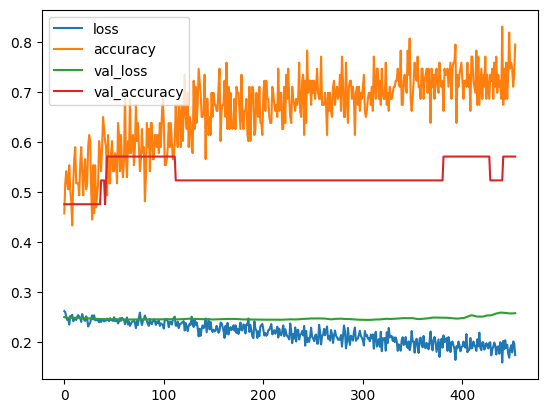

In [73]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [74]:
predictions = model.predict(X_test)
predictions[:5]

1/1 [==============================] - 0s 90ms/step


array([[0.51544535],
       [0.71103024],
       [0.7376474 ],
       [0.2617782 ],
       [0.531165  ]], dtype=float32)

In [75]:
# pasar predictions a 0-1
#predictions = predictions > 0.5
from sklearn.preprocessing import binarize

predictions=binarize(predictions, threshold=0.5)
predictions[:5]

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [76]:
#Resultados
clases = [0, 1]

array_clase_test=np.array(y_test)
# Calcular y mostrar la matriz de confusión
cnf_matrix = confusion_matrix(array_clase_test, predictions)
print("Confusion Matrix:\n", cnf_matrix)

# Calcular y mostrar el reporte de clasificación
report = classification_report(array_clase_test, predictions)
print("\nClassification Report con SMOT :\n", report)

# Calcular y mostrar la exactitud
accuracy = accuracy_score(array_clase_test, predictions)
print("\nAccuracy:\n", accuracy)

Confusion Matrix:
 [[6 5]
 [4 6]]

Classification Report con SMOT :
               precision    recall  f1-score   support

           0       0.60      0.55      0.57        11
           1       0.55      0.60      0.57        10

    accuracy                           0.57        21
   macro avg       0.57      0.57      0.57        21
weighted avg       0.57      0.57      0.57        21


Accuracy:
 0.5714285714285714


con SMOTE

In [77]:

model = Sequential()
#model.add(Dense(units = int(num_neuronas),activation='relu')) #relu
#model.add(Dropout(0.35))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dense(units = int(num_neuronas_salida),activation='hard_sigmoid')) #   softmax
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['binary_accuracy'])

In [78]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=150)
#con SMOTE

model.fit(x=X_train_res,
          y=y_train_res,
          epochs=800,
          batch_size=50,
          validation_data=(X_test, y_test), verbose=1
        ,          callbacks=[early_stop]
          )

Epoch 1/800
2/2 [==============================] - 2s 209ms/step - loss: 0.2566 - accuracy: 0.4524 - val_loss: 0.2542 - val_accuracy: 0.5238
Epoch 2/800
2/2 [==============================] - 0s 34ms/step - loss: 0.2587 - accuracy: 0.4524 - val_loss: 0.2540 - val_accuracy: 0.5238
Epoch 3/800
2/2 [==============================] - 0s 34ms/step - loss: 0.2603 - accuracy: 0.4048 - val_loss: 0.2539 - val_accuracy: 0.5238
Epoch 4/800
2/2 [==============================] - 0s 36ms/step - loss: 0.2500 - accuracy: 0.5119 - val_loss: 0.2538 - val_accuracy: 0.5238
Epoch 5/800
2/2 [==============================] - 0s 32ms/step - loss: 0.2576 - accuracy: 0.4167 - val_loss: 0.2537 - val_accuracy: 0.5238
Epoch 6/800
2/2 [==============================] - 0s 34ms/step - loss: 0.2526 - accuracy: 0.4762 - val_loss: 0.2536 - val_accuracy: 0.5238
Epoch 7/800
2/2 [==============================] - 0s 36ms/step - loss: 0.2577 - accuracy: 0.4286 - val_loss: 0.2536 - val_accuracy: 0.5238
Epoch 8/800
2/2 [==

<Axes: >

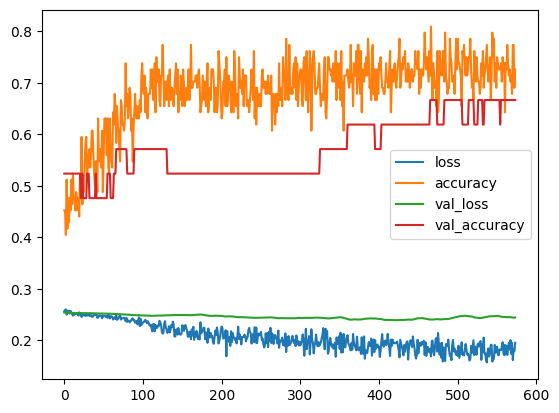

In [79]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [80]:
predictions = model.predict(X_test)
predictions[:5]

1/1 [==============================] - 0s 71ms/step


array([[0.5136848 ],
       [0.72193456],
       [0.7857832 ],
       [0.21227324],
       [0.74446034]], dtype=float32)

In [81]:
# pasar predictions a 0-1
#predictions = predictions > 0.5
from sklearn.preprocessing import binarize

predictions=binarize(predictions, threshold=0.5)
predictions[:5]

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [82]:
clases = [0, 1]

array_clase_test=np.array(y_test)
# Calcular y mostrar la matriz de confusión
cnf_matrix = confusion_matrix(array_clase_test, predictions)
print("Confusion Matrix:\n", cnf_matrix)

# Calcular y mostrar el reporte de clasificación
report = classification_report(array_clase_test, predictions)
print("\nClassification Report sin tabaco 10 var originales:\n", report)

# Calcular y mostrar la exactitud
accuracy = accuracy_score(array_clase_test, predictions)
print("\nAccuracy:\n", accuracy)

Confusion Matrix:
 [[8 3]
 [4 6]]

Classification Report sin tabaco 10 var originales:
               precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.67      0.60      0.63        10

    accuracy                           0.67        21
   macro avg       0.67      0.66      0.66        21
weighted avg       0.67      0.67      0.67        21


Accuracy:
 0.6666666666666666


##Modelos para grupos 0 y 1

In [83]:
df_c123 = df[ (df['cluster']<2 )]
df_c123

,sbp,ldl,adiposity,typea,alcohol,age,chd,tabaco_anual,famhist_Absent,famhist_Present,cluster
0,160,5.73,23.11,49,97.20,52,1,0.324324,False,True,1
1,144,4.41,28.61,55,2.06,63,1,0.000208,True,False,0
2,118,3.48,32.28,52,3.81,46,0,0.002581,False,True,0
3,170,6.41,38.03,51,24.26,58,1,0.174419,False,True,1
4,134,3.50,27.78,60,57.34,49,1,0.400000,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...
457,214,5.98,31.72,64,0.00,58,0,0.009302,True,False,1
458,182,4.41,32.10,52,18.72,52,1,0.113514,True,False,1
459,108,1.59,15.23,40,26.64,55,0,0.075000,True,False,0
460,118,11.61,30.79,64,23.97,40,0,0.216000,True,False,0


In [84]:
df_c123['ldl'].count()

295

In [85]:
df_c123['chd'].value_counts()

chd
0    158
1    137
Name: count, dtype: int64

In [86]:
X = df_c123.drop(['chd','cluster'], axis=1)
y = df_c123['chd']

In [87]:
X.shape

(295, 9)

In [88]:
#Normalizamos con standarscaler - escala entre 0 y variacion estandars
#scaler = StandardScaler()
scaler = MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[4.72727273e-01, 3.31010453e-01, 3.57427056e-01, ...,
        4.57380457e-01, 0.00000000e+00, 1.00000000e+00],
       [3.27272727e-01, 2.39024390e-01, 5.39787798e-01, ...,
        2.93803419e-04, 1.00000000e+00, 0.00000000e+00],
       [9.09090909e-02, 1.74216028e-01, 6.61472149e-01, ...,
        3.63937138e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 4.25087108e-02, 9.61538462e-02, ...,
        1.05769231e-01, 1.00000000e+00, 0.00000000e+00],
       [9.09090909e-02, 7.40766551e-01, 6.12068966e-01, ...,
        3.04615385e-01, 1.00000000e+00, 0.00000000e+00],
       [2.18181818e-01, 2.67595819e-01, 6.98938992e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

# Reg Logistica

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=270724)
X_train.shape

(236, 9)

sin SMOTE

In [90]:
# Crear el modelo de regresión logística
model = LogisticRegression(solver='lbfgs', max_iter=1000)
# Validación cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=270724)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
# Entrenar el modelo
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [91]:
# Evaluar el modelo
y_pred = model.predict(X_test)

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print('Classification Report Report sdb sin SMOTE:')
print(class_report)

# Resultados de validación cruzada
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.2f}')

Accuracy: 0.69
Confusion Matrix:
[[25  7]
 [11 16]]
Classification Report Report sdb sin SMOTE:
              precision    recall  f1-score   support

           0       0.69      0.78      0.74        32
           1       0.70      0.59      0.64        27

    accuracy                           0.69        59
   macro avg       0.70      0.69      0.69        59
weighted avg       0.69      0.69      0.69        59

Cross-validation accuracy scores: [0.70833333 0.66666667 0.45833333 0.66666667 0.625      0.70833333
 0.52173913 0.65217391 0.60869565 0.69565217]
Mean cross-validation accuracy: 0.63


Con SMOTE y best Model

In [92]:
# Usamos GridSearchCV para encontrar los mejores hiperparámetros para el modelo de RL.

# Hiperparámetros para buscar
param_grid = {
    'C': [  20,25,35,35.5,36,37,38,39,40],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],

}

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=2000)


# Validación cruzada
#cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=270724)
#cv_scores = cross_val_score(model, X_train_res, y_train_res, cv=cv, scoring='accuracy')

# Configurar GridSearchCV
grid_search = GridSearchCV(model,
                           param_grid,
                           cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=270224),
                           scoring='accuracy')


# Entrenar el modelo
grid_search.fit(X_train_res, y_train_res)


# Mejor modelo encontrado
best_model = grid_search.best_estimator_
print(best_model.solver)
best_model


liblinear


LogisticRegression(C=20, max_iter=2000, solver='liblinear')

In [93]:
# Evaluar el mejor modelo de regresión logística
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Logistic Regression Accuracy: 0.63
Confusion Matrix:
[[19 13]
 [ 9 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.59      0.63        32
           1       0.58      0.67      0.62        27

    accuracy                           0.63        59
   macro avg       0.63      0.63      0.63        59
weighted avg       0.63      0.63      0.63        59



In [94]:
X_train.shape

(236, 9)

In [95]:
X_train_res.shape

(84, 9)

In [96]:
''' Con StandardScaler
Accuracy = 0.67
Confusion Matrix:
[[22  9]
 [14 24]]
Classification Report ldl con SMOTE :               precision    recall  f1-score   support

           0       0.61      0.71      0.66        31
           1       0.73      0.63      0.68        38

    accuracy                           0.67        69
   macro avg       0.67      0.67      0.67        69
weighted avg       0.68      0.67      0.67        69
'''

' Con StandardScaler\nAccuracy = 0.67\nConfusion Matrix:\n[[22  9]\n [14 24]]\nClassification Report ldl con SMOTE :               precision    recall  f1-score   support\n\n           0       0.61      0.71      0.66        31\n           1       0.73      0.63      0.68        38\n\n    accuracy                           0.67        69\n   macro avg       0.67      0.67      0.67        69\nweighted avg       0.68      0.67      0.67        69\n'

No hay diferencia si lo hacemos con SMOTE porque solo crea 4 registros,
Coger el más optimo tampoco influye.

In [97]:
#Matriz con edad con StandardScaler
#[[22 14]
 #[10 21]]


In [98]:
X_train.shape

(236, 9)

In [99]:
X_train_res.shape

(84, 9)

Con MaxScaler mejoramos accuracy y matriz de confusion

#SVM

sin SMOTE

In [100]:
svm_rbf = SVC ( kernel='sigmoid', random_state=270224)
param_grid_rbf = {
    'C': [0.1, 1, 10, 25, 50, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}
grid_search_rbf = GridSearchCV(svm_rbf,
                               param_grid_rbf,
                               cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=270224),
                               scoring = 'accuracy',
                               verbose = 1,
                               n_jobs=-1)
grid_search_rbf.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=270224, shuffle=True),
             estimator=SVC(kernel='sigmoid', random_state=270224), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 25, 50, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             scoring='accuracy', verbose=1)

In [101]:
best_rbf = grid_search_rbf.best_estimator_
best_rbf

SVC(C=25, gamma=0.1, kernel='sigmoid', random_state=270224)

In [102]:
y_pred=best_rbf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Regression Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix age - LDL:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report age - LDL sin SMOTE:')
print(class_report)

SVM Regression Accuracy: 0.69
Confusion Matrix age - LDL:
[[22 10]
 [ 8 19]]
Classification Report age - LDL sin SMOTE:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        32
           1       0.66      0.70      0.68        27

    accuracy                           0.69        59
   macro avg       0.69      0.70      0.69        59
weighted avg       0.70      0.69      0.70        59



In [103]:
svm_rbf = SVC ( kernel='sigmoid', random_state=270224)
param_grid_rbf = {
    'C': [0.1, 1, 10, 25, 50, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}
grid_search_rbf = GridSearchCV(svm_rbf,
                               param_grid_rbf,
                               cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=270224),
                               scoring = 'accuracy',
                               verbose = 1,
                               n_jobs=-1)
grid_search_rbf.fit(X_train_res,y_train_res)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=270224, shuffle=True),
             estimator=SVC(kernel='sigmoid', random_state=270224), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 25, 50, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             scoring='accuracy', verbose=1)

In [104]:
best_rbf = grid_search_rbf.best_estimator_
best_rbf

SVC(C=50, gamma=0.1, kernel='sigmoid', random_state=270224)

In [105]:
y_pred=best_rbf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Regression Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix age - LDL:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report age - LDL:')
print(class_report)

SVM Regression Accuracy: 0.61
Confusion Matrix age - LDL:
[[18 14]
 [ 9 18]]
Classification Report age - LDL:
              precision    recall  f1-score   support

           0       0.67      0.56      0.61        32
           1       0.56      0.67      0.61        27

    accuracy                           0.61        59
   macro avg       0.61      0.61      0.61        59
weighted avg       0.62      0.61      0.61        59



##Neuronal

In [106]:
num_neuronas = X_train.shape[1]
num_neuronas_salida=1 # ha de ser uno de salida #len(df["chd"].unique())
print(f"1 capa:{num_neuronas} salida: {num_neuronas_salida}")

1 capa:9 salida: 1


In [107]:
# Modelo inicial de 9, 3 capas intermedia de 9 neuronas y salida de 1 neurona con relu sin dropout
#Si funciona: 1 - ( 0.35)-2 ( 0.3) - 3 (0.2)- 4 - 5

model = Sequential()
model.add(Dense(units = int(num_neuronas),activation='relu')) #relu

model.add(Dropout(0.35))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = int(num_neuronas),activation='relu'))

model.add(Dense(units = int(num_neuronas_salida),activation='hard_sigmoid')) #  softmax

model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['binary_accuracy'])


In [108]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)

In [109]:
model.fit(x=X_train,
          y=y_train,
          epochs=800,
          batch_size=50,
          validation_data=(X_test, y_test), verbose=1
        ,          callbacks=[early_stop]
          )

Epoch 1/800
5/5 [==============================] - 1s 54ms/step - loss: 0.2495 - accuracy: 0.4873 - val_loss: 0.2500 - val_accuracy: 0.4237
Epoch 2/800
5/5 [==============================] - 0s 10ms/step - loss: 0.2518 - accuracy: 0.4703 - val_loss: 0.2496 - val_accuracy: 0.4915
Epoch 3/800
5/5 [==============================] - 0s 11ms/step - loss: 0.2476 - accuracy: 0.5763 - val_loss: 0.2493 - val_accuracy: 0.5085
Epoch 4/800
5/5 [==============================] - 0s 14ms/step - loss: 0.2489 - accuracy: 0.5169 - val_loss: 0.2488 - val_accuracy: 0.5763
Epoch 5/800
5/5 [==============================] - 0s 10ms/step - loss: 0.2489 - accuracy: 0.5381 - val_loss: 0.2482 - val_accuracy: 0.6102
Epoch 6/800
5/5 [==============================] - 0s 16ms/step - loss: 0.2498 - accuracy: 0.5042 - val_loss: 0.2477 - val_accuracy: 0.5932
Epoch 7/800
5/5 [==============================] - 0s 11ms/step - loss: 0.2522 - accuracy: 0.5297 - val_loss: 0.2474 - val_accuracy: 0.5763
Epoch 8/800
5/5 [===

<Axes: >

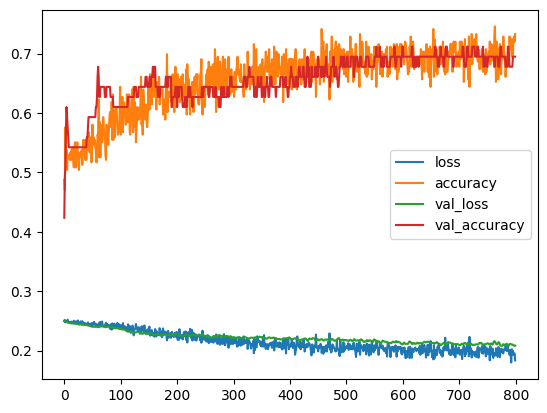

In [110]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [111]:
predictions = model.predict(X_test)
predictions[:5]

2/2 [==============================] - 0s 6ms/step


array([[0.73781264],
       [0.24666527],
       [0.333422  ],
       [0.        ],
       [0.30362624]], dtype=float32)

In [112]:
# pasar predictions a 0-1
#predictions = predictions > 0.5
from sklearn.preprocessing import binarize

predictions=binarize(predictions, threshold=0.5)
predictions[:5]

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [113]:
clases = [0, 1]

array_clase_test=np.array(y_test)
# Calcular y mostrar la matriz de confusión
cnf_matrix = confusion_matrix(array_clase_test, predictions)
print("Confusion Matrix:\n", cnf_matrix)

# Calcular y mostrar el reporte de clasificación
report = classification_report(array_clase_test, predictions)
print("\nClassification Report sin SMOT 10 var originales:\n", report)

# Calcular y mostrar la exactitud
accuracy = accuracy_score(array_clase_test, predictions)
print("\nAccuracy:\n", accuracy)

Confusion Matrix:
 [[21 11]
 [ 7 20]]

Classification Report sin SMOT 10 var originales:
               precision    recall  f1-score   support

           0       0.75      0.66      0.70        32
           1       0.65      0.74      0.69        27

    accuracy                           0.69        59
   macro avg       0.70      0.70      0.69        59
weighted avg       0.70      0.69      0.70        59


Accuracy:
 0.6949152542372882


# Con SMOTE

In [114]:
# Modelo inicial de 9, 3 capas intermedia de 9 neuronas y salida de 1 neurona con relu sin dropout
#Si funciona: 1 - ( 0.35)-2 ( 0.3) - 3 (0.2)- 4 - 5

model = Sequential()
model.add(Dense(units = int(num_neuronas),activation='relu')) #relu
model.add(Dropout(0.35))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dense(units = int(num_neuronas_salida),activation='hard_sigmoid')) #   softmax
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['binary_accuracy'])

In [115]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=150)
#con SMOTE
model.fit(x=X_train_res,
          y=y_train_res,
          epochs=800,
          batch_size=50,
          validation_data=(X_test, y_test), verbose=1
        ,          callbacks=[early_stop]
          )

Epoch 1/800
2/2 [==============================] - 1s 220ms/step - loss: 0.2439 - accuracy: 0.6071 - val_loss: 0.2486 - val_accuracy: 0.5424
Epoch 2/800
2/2 [==============================] - 0s 39ms/step - loss: 0.2448 - accuracy: 0.5357 - val_loss: 0.2485 - val_accuracy: 0.5424
Epoch 3/800
2/2 [==============================] - 0s 38ms/step - loss: 0.2514 - accuracy: 0.4881 - val_loss: 0.2485 - val_accuracy: 0.5424
Epoch 4/800
2/2 [==============================] - 0s 33ms/step - loss: 0.2512 - accuracy: 0.5595 - val_loss: 0.2485 - val_accuracy: 0.5424
Epoch 5/800
2/2 [==============================] - 0s 48ms/step - loss: 0.2542 - accuracy: 0.4762 - val_loss: 0.2484 - val_accuracy: 0.5424
Epoch 6/800
2/2 [==============================] - 0s 33ms/step - loss: 0.2474 - accuracy: 0.5000 - val_loss: 0.2484 - val_accuracy: 0.5424
Epoch 7/800
2/2 [==============================] - 0s 35ms/step - loss: 0.2440 - accuracy: 0.5952 - val_loss: 0.2483 - val_accuracy: 0.5424
Epoch 8/800
2/2 [==

<Axes: >

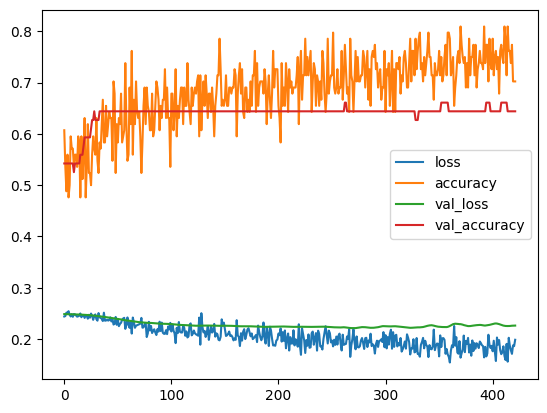

In [116]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [117]:
predictions = model.predict(X_test)
predictions[:5]

2/2 [==============================] - 0s 7ms/step


array([[0.89778316],
       [0.21464506],
       [0.30204368],
       [0.25294977],
       [0.6365063 ]], dtype=float32)

In [118]:
# pasar predictions a 0-1
#predictions = predictions > 0.5
from sklearn.preprocessing import binarize

predictions=binarize(predictions, threshold=0.5)
predictions[:5]

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [119]:
#Resultados
clases = [0, 1]

array_clase_test=np.array(y_test)
# Calcular y mostrar la matriz de confusión
cnf_matrix = confusion_matrix(array_clase_test, predictions)
print("Confusion Matrix:\n", cnf_matrix)

# Calcular y mostrar el reporte de clasificación
report = classification_report(array_clase_test, predictions)
print("\nClassification Report con SMOT 10 var originales:\n", report)

# Calcular y mostrar la exactitud
accuracy = accuracy_score(array_clase_test, predictions)
print("\nAccuracy:\n", accuracy)

Confusion Matrix:
 [[21 11]
 [10 17]]

Classification Report con SMOT 10 var originales:
               precision    recall  f1-score   support

           0       0.68      0.66      0.67        32
           1       0.61      0.63      0.62        27

    accuracy                           0.64        59
   macro avg       0.64      0.64      0.64        59
weighted avg       0.65      0.64      0.64        59


Accuracy:
 0.6440677966101694
